# Sales Data Analysis Project


##  Import Required Libraries

In [1]:
import pandas as pd
import os
import matplotlib as plt

## Data Processing Function

In [29]:
def process_sales_data(data_directory='./Sales_Data'):
    files = [file for file in os.listdir(data_directory) if file.endswith('.csv')]
    all_months_data = pd.DataFrame()
    
    for file in files:
        file_path = os.path.join(data_directory, file)
        df = pd.read_csv(file_path)
        all_months_data = pd.concat([all_months_data, df], ignore_index=True)
    
    # Data cleaning steps
    all_months_data = all_months_data.dropna(how='all')
    all_months_data = all_months_data[~all_months_data['Order Date'].str.contains('Order Date', na=False)]
    
    return all_months_data

# Process the data
all_data = process_sales_data()


In [30]:
# City extraction function
def extract_city_state(address):
    try:
        parts = address.split(',')
        city = parts[1].strip()
        state = parts[2].split()[1]
        return f"{city} ({state})"
    except (IndexError, AttributeError):
        return "Unknown"

all_data['City'] = all_data['Purchase Address'].apply(extract_city_state)

In [4]:
#correcting columns type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Augmenting data with additional columns

In [5]:
#adding month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (75001),4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (02215),4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (90001),4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (90001),4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (90001),4


In [6]:
#adding city column
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX),4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA),4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4


#### Question 1: What was the best month for sales? How much was earned that month?

In [7]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')


In [8]:
# Selecting specific columns from the DataFrame
selected_columns = all_data[['City', 'Quantity Ordered', 'Price Each', 'Month', 'Sales']]
print(selected_columns)


                       City  Quantity Ordered  Price Each  Month   Sales
0              Dallas  (TX)                 2       11.95      4   23.90
2              Boston  (MA)                 1       99.99      4   99.99
3         Los Angeles  (CA)                 1      600.00      4  600.00
4         Los Angeles  (CA)                 1       11.99      4   11.99
5         Los Angeles  (CA)                 1       11.99      4   11.99
...                     ...               ...         ...    ...     ...
186845    Los Angeles  (CA)                 3        2.99      9    8.97
186846  San Francisco  (CA)                 1      700.00      9  700.00
186847  San Francisco  (CA)                 1      700.00      9  700.00
186848  San Francisco  (CA)                 1      379.99      9  379.99
186849  San Francisco  (CA)                 1       11.95      9   11.95

[185950 rows x 5 columns]


In [26]:
#summing up the numerical columns
numeric_columns = ['Quantity Ordered', 'Price Each', 'Sales']  
selected_columns.loc[:, numeric_columns] = selected_columns[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'Month' and sum only the numeric columns
grouped_data = selected_columns.groupby(['Month'])[numeric_columns].sum()

# Display the corrected output
grouped_data. head(12)


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


range(1, 13)


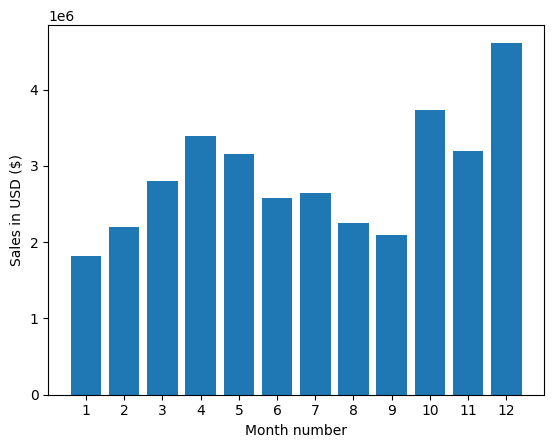

In [10]:
#visualizing sales in different months
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

###### Findings: Month December incurred the most sales

#### Question 2: What city sold the most product?

In [11]:
selected_columns.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


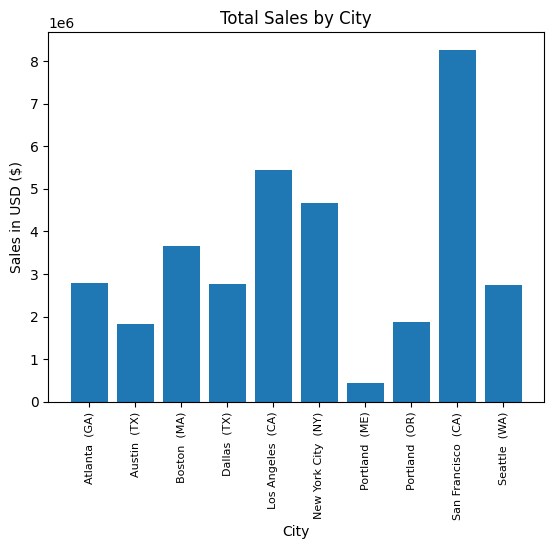

In [28]:
#visualazing sales in different cities

# Grouping data by 'City' and calculating the sum of 'Sales' for each city
sales_data = selected_columns.groupby('City').sum()['Sales']

# 'keys' contains valid city names
keys = sales_data.index

# Plot the data
plt.bar(keys, sales_data)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')  # Corrected label to match the data
plt.xticks(rotation='vertical', size=8)  # Rotate x-axis labels
plt.title('Total Sales by City')  # Optional: Add a title
plt.show()



###### Findings: City San Francisco got the most sales

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?


In [13]:
# Adding hour, minute, count column
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),4,23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),4,99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4,11.99,9,27,1


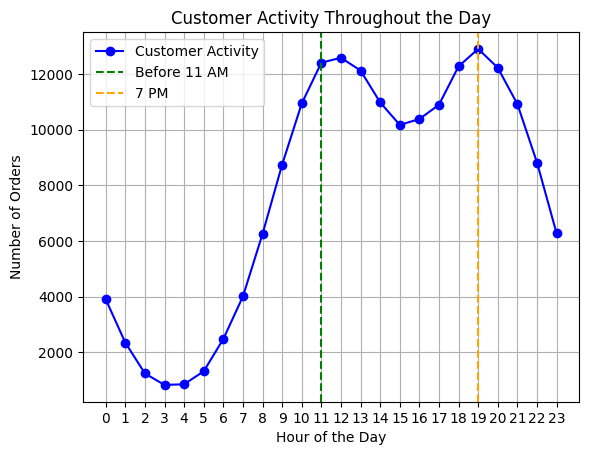

In [14]:
# Generating a flat list of unique hour values (0 to 23)
keys = list(all_data['Hour'].unique())
keys.sort()  

# Plotting customer activity
plt.plot(
    keys,
    all_data.groupby(['Hour']).count()['Count'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Customer Activity'
)

plt.xticks(keys)  # Using the sorted list of unique hours
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Customer Activity Throughout the Day')
plt.grid()

# Highlighting recommended times
plt.axvline(11, color='green', linestyle='--', label='Before 11 AM')
plt.axvline(19, color='orange', linestyle='--', label='7 PM')
plt.legend()

plt.show()


##### Findings: It is recommended slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

In [15]:
# Grouping Products by Order ID
grouped = all_data.groupby('Order ID')['Product'].apply(list)
grouped.head()

Order ID
141234                      [iPhone]
141235    [Lightning Charging Cable]
141236            [Wired Headphones]
141237            [27in FHD Monitor]
141238            [Wired Headphones]
Name: Product, dtype: object

In [16]:
from itertools import combinations
from collections import Counter

# Generating all pairs of products sold together
product_combinations = Counter()

for products in grouped:
    product_combinations.update(combinations(sorted(products), 2))  # Generate pairs

# Displaying the most common combinations
print(product_combinations.most_common(10))


[(('Lightning Charging Cable', 'iPhone'), 1015), (('Google Phone', 'USB-C Charging Cable'), 999), (('Wired Headphones', 'iPhone'), 462), (('Google Phone', 'Wired Headphones'), 423), (('Apple Airpods Headphones', 'iPhone'), 373), (('USB-C Charging Cable', 'Vareebadd Phone'), 368), (('Bose SoundSport Headphones', 'Google Phone'), 228), (('USB-C Charging Cable', 'Wired Headphones'), 205), (('Vareebadd Phone', 'Wired Headphones'), 149), (('Lightning Charging Cable', 'Wired Headphones'), 129)]


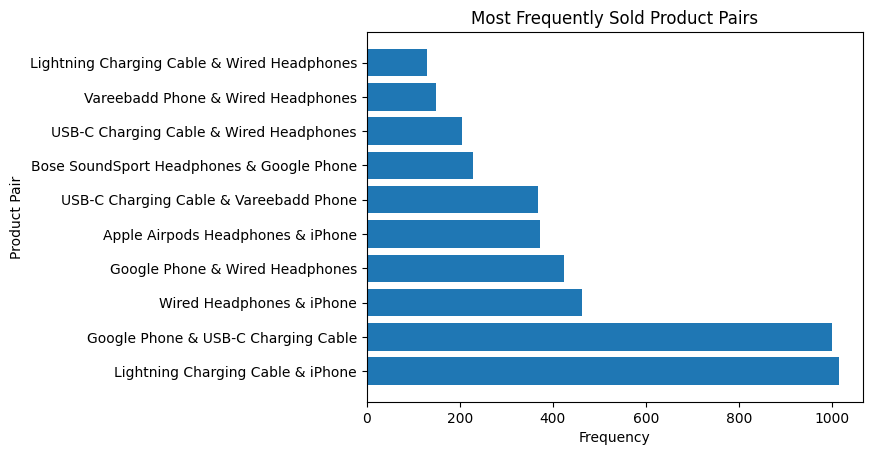

In [17]:
#Visualizing Frequent Combinations
common_combinations = product_combinations.most_common(10)
products, counts = zip(*common_combinations)

plt.barh([' & '.join(pair) for pair in products], counts)
plt.xlabel('Frequency')
plt.ylabel('Product Pair')
plt.title('Most Frequently Sold Product Pairs')
plt.show()


##### Findings: Lightning Charging Cable & iphone are the most sold product pair


#### Question 5: What product sold the most?

In [18]:
#Grouping the Data by Product
product_sales = all_data.groupby('Product')['Quantity Ordered'].sum()

In [19]:
#Finding the Product with the Highest Sales
most_sold_product = product_sales.idxmax()
most_sold_quantity = product_sales.max()

print(f"The most sold product is {most_sold_product} with {most_sold_quantity} units sold.")


The most sold product is AAA Batteries (4-pack) with 31017 units sold.


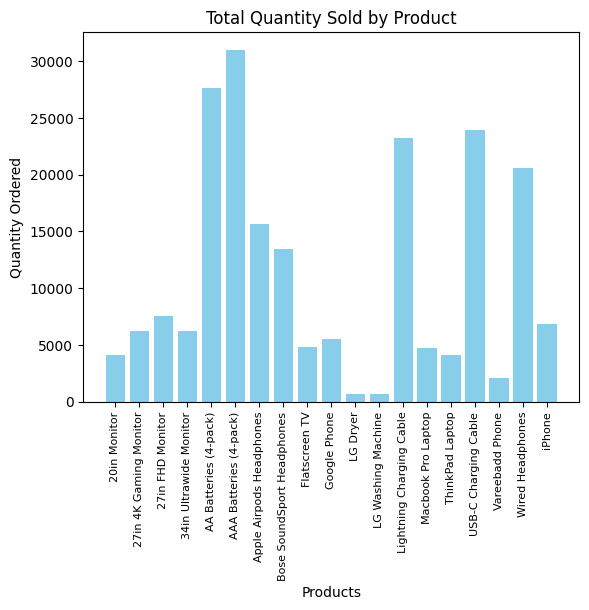

In [20]:
#Visualizing the results
import matplotlib.pyplot as plt

products = product_sales.index
quantities = product_sales.values

plt.bar(products, quantities, color='skyblue')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.title('Total Quantity Sold by Product')
plt.xticks(rotation='vertical', size=8)
plt.show()


###### Findings: The most sold product is AAA Batteries (4-pack) with 31017 units sold.

#### Question 6: Why did the product sold the most?
##### Steps to Analyze Factors Influencing High Sales:
##### 1. Check Price Competitiveness
##### 2. Seasonality of Sales
##### 3. Cross-Selling with Other Products
##### 4. Demographics and Popularity
##### 5. Marketing and Discounts

In [21]:
#Checking the price competitiveness
avg_prices = all_data.groupby('Product')['Price Each'].mean()
print(f"Average Price of {most_sold_product}: {avg_prices[most_sold_product]}")
print(avg_prices)


Average Price of AAA Batteries (4-pack): 2.99
Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


###### Findings: Popularity is the reason for cheaper price $2.99

Month
1     1600
2     1972
3     2479
4     2939
5     2927
6     2162
7     2365
8     2021
9     1923
10    3363
11    3025
12    4241
Name: Quantity Ordered, dtype: int64


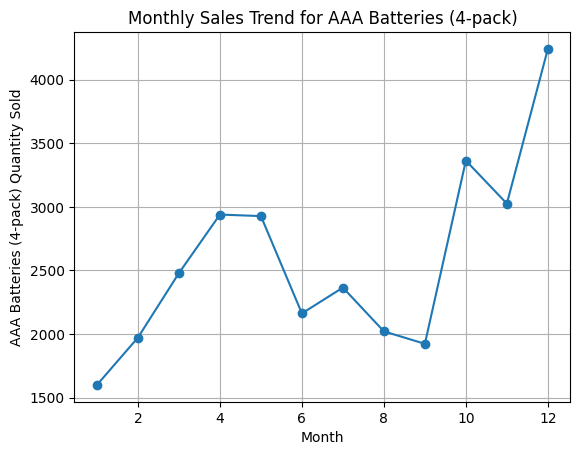

In [22]:
#seasonality of sales
monthly_sales = all_data[all_data['Product'] == most_sold_product].groupby('Month')['Quantity Ordered'].sum()
print(monthly_sales)

# Visualize sales by month
import matplotlib.pyplot as plt
months = range(1, 13)
plt.plot(months, monthly_sales, marker='o')
plt.xlabel('Month')
plt.ylabel(f'{most_sold_product} Quantity Sold')
plt.title(f'Monthly Sales Trend for {most_sold_product}')
plt.grid()
plt.show()


###### Findings: High sales during specific months like December indicates seasonality or promotional offers.

In [23]:
#Cross-Selling with Other Products
from itertools import combinations
from collections import Counter

grouped_orders = all_data.groupby('Order ID')['Product'].apply(list)

product_combinations = Counter()
for products in grouped_orders:
    if most_sold_product in products:
        product_combinations.update(combinations(sorted(products), 2))

# Display combinations involving the most sold product
print(product_combinations.most_common(5))


[(('AAA Batteries (4-pack)', 'USB-C Charging Cable'), 95), (('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'), 87), (('AAA Batteries (4-pack)', 'Wired Headphones'), 86), (('AAA Batteries (4-pack)', 'Apple Airpods Headphones'), 81), (('AAA Batteries (4-pack)', 'Lightning Charging Cable'), 80)]


###### Findings: Sales is benefitting from bundling as well

City
Atlanta  (GA)          2359
Austin  (TX)           1668
Boston  (MA)           3461
Dallas  (TX)           2504
Los Angeles  (CA)      4967
New York City  (NY)    4124
Portland  (ME)          358
Portland  (OR)         1722
San Francisco  (CA)    7408
Seattle  (WA)          2446
Name: Quantity Ordered, dtype: int64


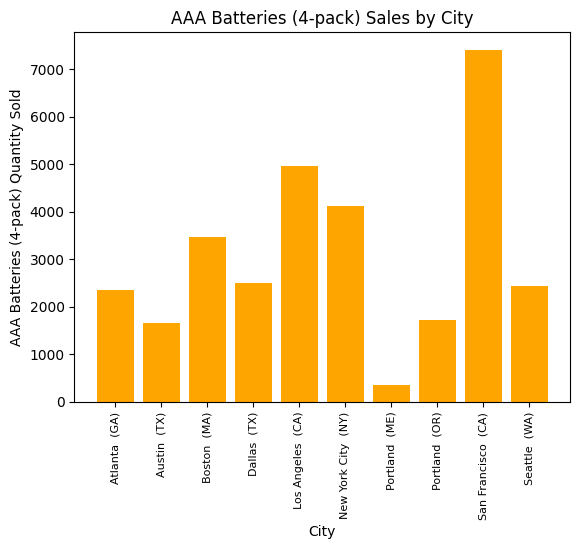

In [24]:
#checking demographics for popularity
city_sales = all_data[all_data['Product'] == most_sold_product].groupby('City')['Quantity Ordered'].sum()
print(city_sales)

# Visualize city-based sales
cities = city_sales.index
quantities = city_sales.values

plt.bar(cities, quantities, color='orange')
plt.xlabel('City')
plt.ylabel(f'{most_sold_product} Quantity Sold')
plt.title(f'{most_sold_product} Sales by City')
plt.xticks(rotation='vertical', size=8)
plt.show()


###### Findings: Product's success is concentrated in specific regions

In [25]:
#Marketing and discounts
discounts = all_data[all_data['Product'] == most_sold_product]['Price Each'].describe()
print(discounts)


count    2.064100e+04
mean     2.990000e+00
std      8.881999e-16
min      2.990000e+00
25%      2.990000e+00
50%      2.990000e+00
75%      2.990000e+00
max      2.990000e+00
Name: Price Each, dtype: float64


##### Findings: Price was consistent(mean, min, max) $2.99. std is effectively 0, means no price fluctuations. No discounts were there. The high sales of this product were not driven by price variations, instead other factors were responsible.